In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

C:\Users\Yash\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# What is the distribution of age among heart failure patients in the dataset


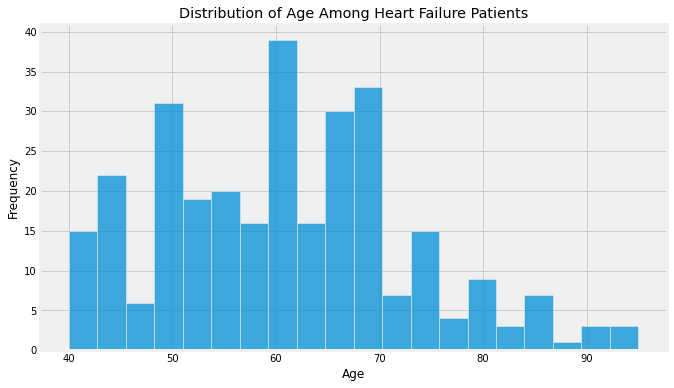

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20)
plt.title('Distribution of Age Among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# How does the death rate vary with age


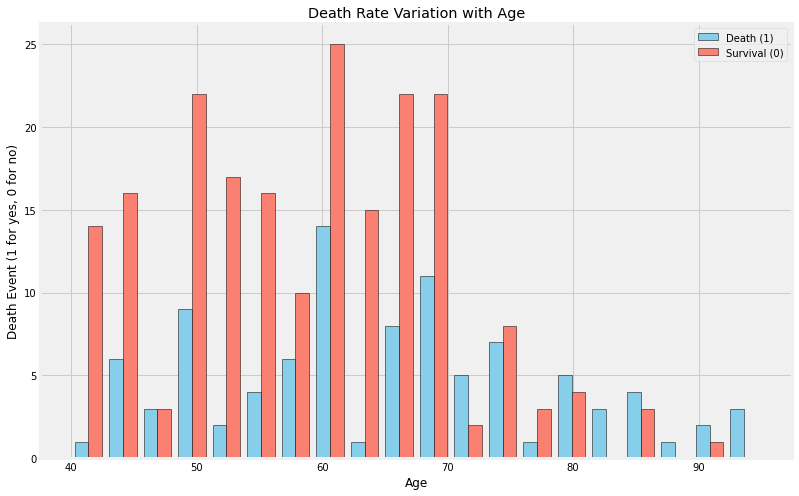

In [11]:

plt.figure(figsize=(12,8))

plt.hist([df[df['DEATH_EVENT'] == 1]['age'],
          df[df['DEATH_EVENT'] == 0]['age']],
         bins=20, color=['skyblue', 'salmon'], label=['Death (1)', 'Survival (0)'], edgecolor='black')

plt.title('Death Rate Variation with Age')
plt.xlabel("Age")
plt.ylabel("Death Event (1 for yes, 0 for no)")
plt.legend()
plt.show()

In [12]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# What is the percentage of male and female patients in the dataset?


In [13]:

gender_count = df['sex'].value_counts(normalize=True)*100
male_percentage = gender_count[1]
female_percentage = gender_count[0]
print("Percentage of Male Patients:", male_percentage)
print("Percentage of Female Patients:", female_percentage)

Percentage of Male Patients: 64.88294314381271
Percentage of Female Patients: 35.11705685618729


In [14]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# How does the platelet count vary among different age groups?


In [15]:
import pandas as pd

# Define the bins for age groups
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define labels for the age groups
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'age_group' in the dataframe to store the age group of each patient
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


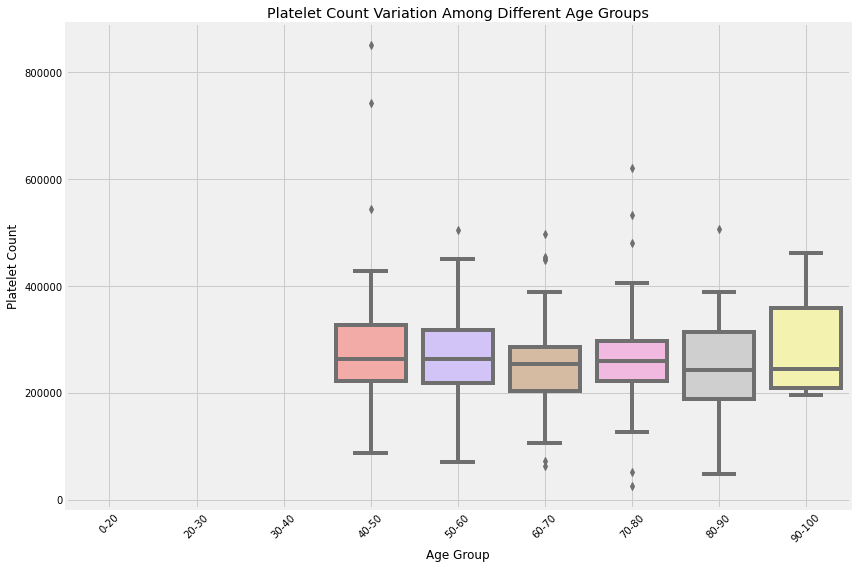

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='age_group', y='platelets', data=df, palette='pastel')
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Is there a correlation between creatinine and sodium levels in the blood?


In [25]:

correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print("Correlation coefficient between creatinine and sodium levels:", correlation)


Correlation coefficient between creatinine and sodium levels: -0.18909521009117414


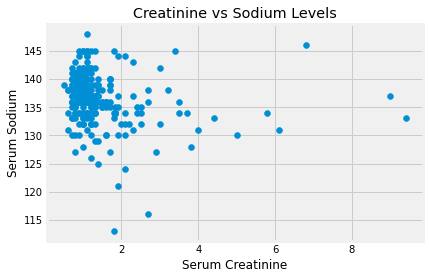

In [27]:
plt.scatter(df['serum_creatinine'], df['serum_sodium'])
plt.title('Creatinine vs Sodium Levels')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')
plt.grid(True)
plt.show()

In [ ]:
# How does th5 prevalenc of high blood pressure differ between male and female patients ?

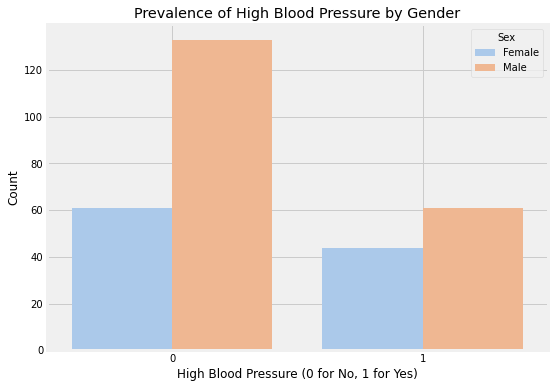

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='high_blood_pressure', hue='sex', data=df, palette='pastel')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure (0 for No, 1 for Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.grid(True)
plt.show()

# What is the relationship between smoking habits and the occurrence of heart failure?

In [30]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

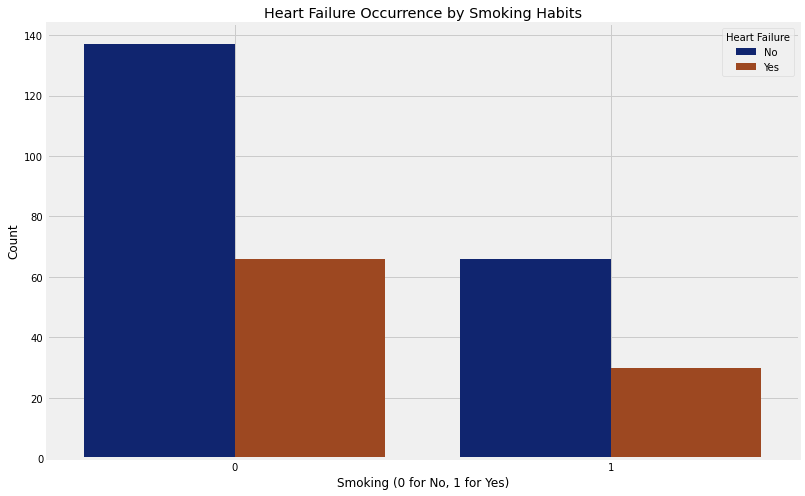

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='dark')
plt.title('Heart Failure Occurrence by Smoking Habits')
plt.xlabel('Smoking (0 for No, 1 for Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Failure', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

#  Are there any noticeable patterns in the distribution of death enents across different age groups ?

In [46]:
px.bar(df, x='age_group', y='DEATH_EVENT', 
             title='Death Rate Variation with Age',
             labels={'age_group': 'Age Group', 'DEATH_EVENT': 'Death Rate'},
             color_discrete_sequence=['skyblue'])

# Is there any significant difference in ejection fraction between patients with and without diabetes?

In [52]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['diabetes'], df['DEATH_EVENT'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)


Chi-square value: 0.0
P-value: 1.0


T-test statistic: -0.08358970647234736
P-value: 0.9334389630426103


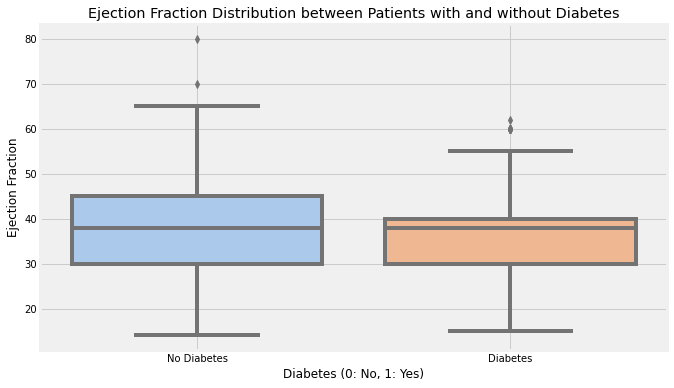

In [57]:
from scipy.stats import ttest_ind


# Selecting data for patients with and without diabetes
with_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
without_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform t-test
t_stat, p_value = ttest_ind(with_diabetes, without_diabetes)

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df, palette='pastel')
plt.title('Ejection Fraction Distribution between Patients with and without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.grid(True)


print("T-test statistic:", t_stat)
print("P-value:", p_value)

plt.show()


# How does the serum creatinine level vary between patients who survived and those who did not?

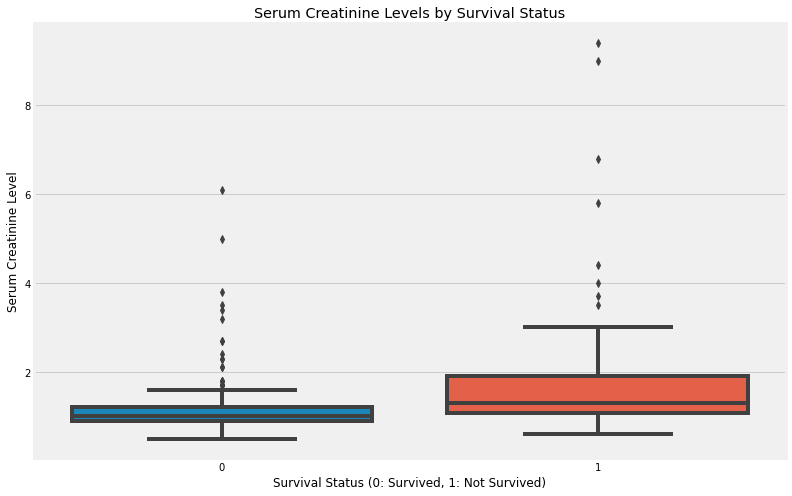

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()


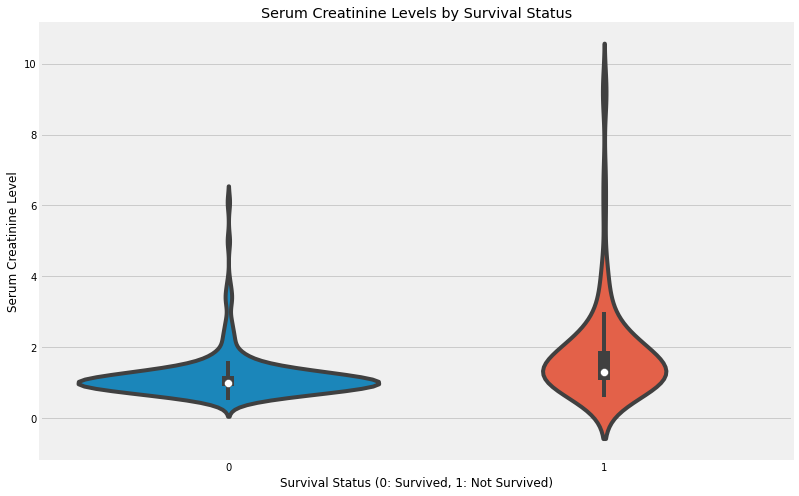

In [65]:
plt.figure(figsize=(12,8))
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()

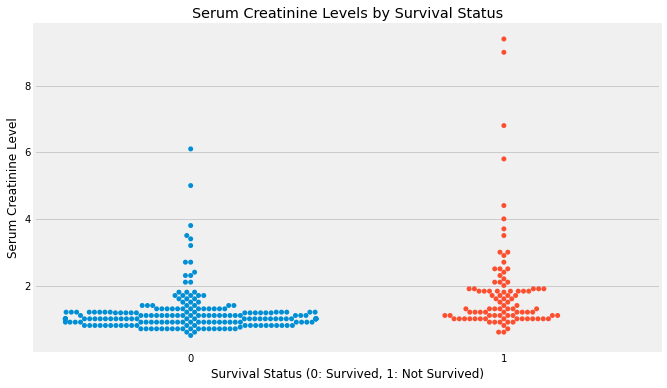

In [67]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Not Survived)')
plt.ylabel('Serum Creatinine Level')
plt.show()